In [1]:
import sys, os
import importlib
from importlib import reload
# importlib.import_module(module_name)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import tqdm
import joblib

sys.path.append("../../../python")
from simhelper import util, root, generator, parser
from simhelper import datatypes
from simhelper import helper_basic as hp
from simhelper import helper_plt as hplt
reload(parser)
reload(datatypes)

sys.path.append("..")
import cut_functions
reload(cut_functions)

np.set_printoptions(edgeitems=30, linewidth=100000, 
    precision=3)

# Plot settings
reload(hplt)
hplt.plt_config() # Default plotting styles
%config InlineBackend.figure_format='retina'

Welcome to JupyROOT 6.28/10


In [109]:
data_dir="/project/6049244/data/MATHUSLA/simulation_v2/upward"
names = ["neutron","proton"]
energies = [1000,2000,5000,"10000_backup"]
# energies = [2000,5000,"10000_backup"]
run = 0

In [110]:
res_all = {}
for name in names:
    res_all[name]={}
    for energy in energies:
        fbkg = root.tfile_reader(f"{data_dir}/{name}_{energy}/run_{run}_digi_recon_skim.root")
        fbkg.ls()
        ## Get metadata
        fbkg.get_tree("metadata_digi")
        metadata_digi = fbkg.get_entry(0)
        fbkg.get_tree("data;1")
        print("Entries", fbkg.entries)
        entries = -1
        res_all[name][energy] = cut_functions.run_processing(fbkg, entries=entries, efficiency = 0.95);

None
Entries 699
Entries 699
Finished
None
Entries 1072
Entries 1072
Finished
None
Entries 2763
Entries 2763
Finished
None
Entries 4312
Entries 4312
Finished
None
Entries 907
Entries 907
Finished
None
Entries 1283
Entries 1283
Finished
None
Entries 3062
Entries 3062
Finished


OSError: Failed to open file /project/6049244/data/MATHUSLA/simulation_v2/upward/proton_10000_backup/run_0_digi_recon_skim.root

TFile**		/project/6049244/data/MATHUSLA/simulation_v2/upward/neutron_1000/run_0_digi_recon_skim.root	
 TFile*		/project/6049244/data/MATHUSLA/simulation_v2/upward/neutron_1000/run_0_digi_recon_skim.root	
  KEY: TTree	metadata;1	Metadata for reconstruction
  KEY: TTree	metadata_digi;1	Metadata for digitization
  KEY: TTree	metadata_recon;1	Simulation metadata
  KEY: TTree	data;1	Reconstruction Tree Skimmed
TFile**		/project/6049244/data/MATHUSLA/simulation_v2/upward/neutron_2000/run_0_digi_recon_skim.root	
 TFile*		/project/6049244/data/MATHUSLA/simulation_v2/upward/neutron_2000/run_0_digi_recon_skim.root	
  KEY: TTree	metadata;1	Metadata for reconstruction
  KEY: TTree	metadata_digi;1	Metadata for digitization
  KEY: TTree	metadata_recon;1	Simulation metadata
  KEY: TTree	data;1	Reconstruction Tree Skimmed
TFile**		/project/6049244/data/MATHUSLA/simulation_v2/upward/neutron_5000/run_0_digi_recon_skim.root	
 TFile*		/project/6049244/data/MATHUSLA/simulation_v2/upward/neutron_5000/run_0_

Error in <TFile::TFile>: file /project/6049244/data/MATHUSLA/simulation_v2/upward/proton_10000_backup/run_0_digi_recon_skim.root does not exist


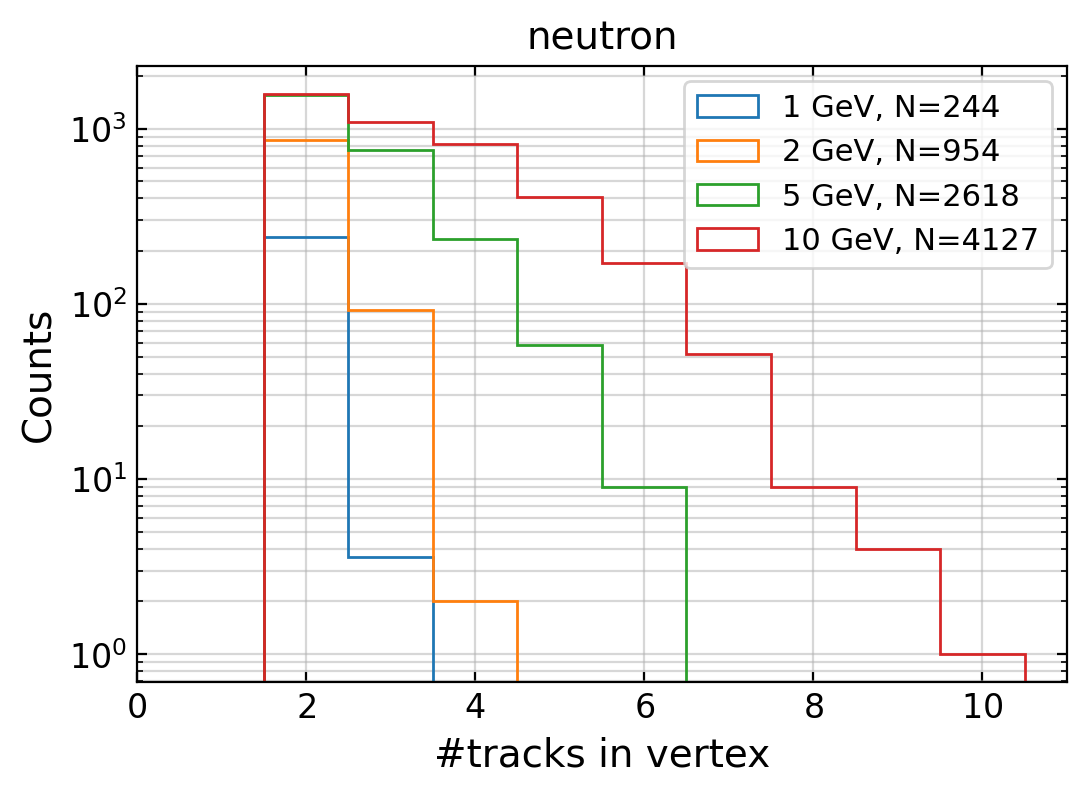

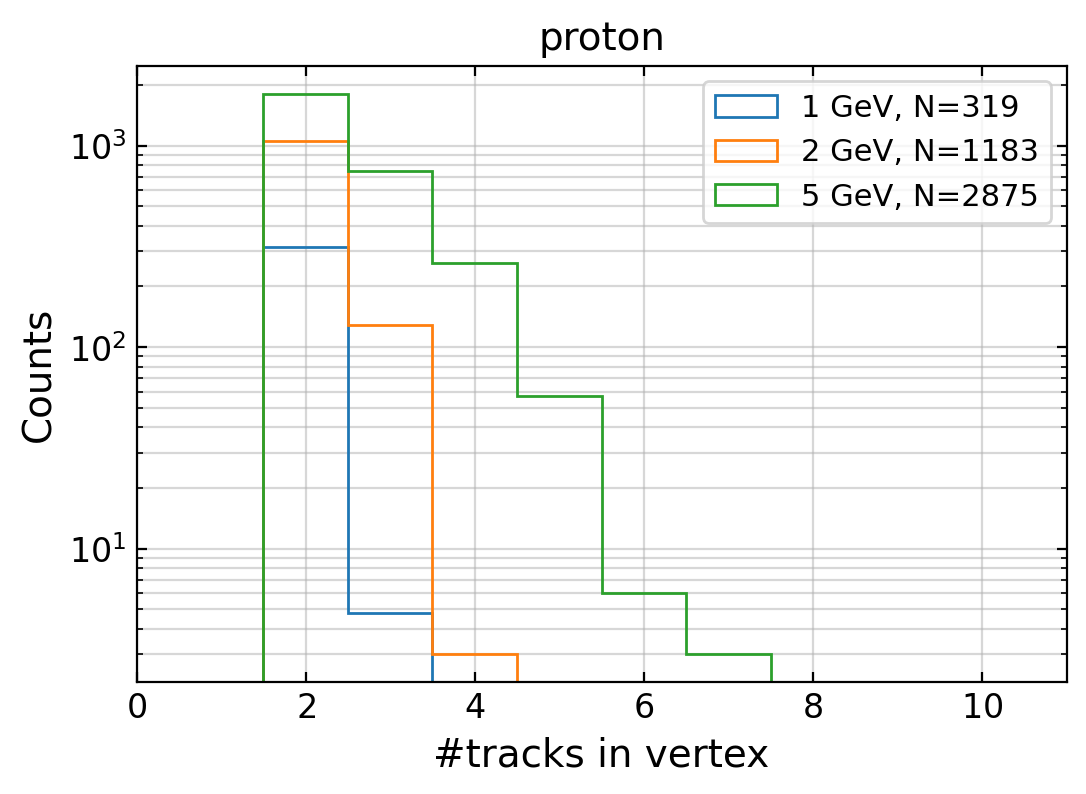

In [111]:
for name in res_all:
    for energy in res_all[name]:
        res = res_all[name][energy]
        bins=np.linspace(0.5,10.5,11)
        weight = 1 if energy!=1000 else 2/5
        n= int(len(res["vertex_ntracks"])*weight)
        plt.hist(res["vertex_ntracks"], bins=bins, alpha=1, histtype="step", label=str(int(f"{energy}".split("_")[0])//1000) + " GeV"+f", N={n}", weights = weight*np.ones(len(res["vertex_ntracks"])))
    plt.legend()
    plt.yscale("log")
    plt.xlabel("#tracks in vertex")
    plt.ylabel("Counts")
    plt.title(f"{name}".split("_")[0])
    plt.grid(which="both", alpha=0.5)
    plt.show()

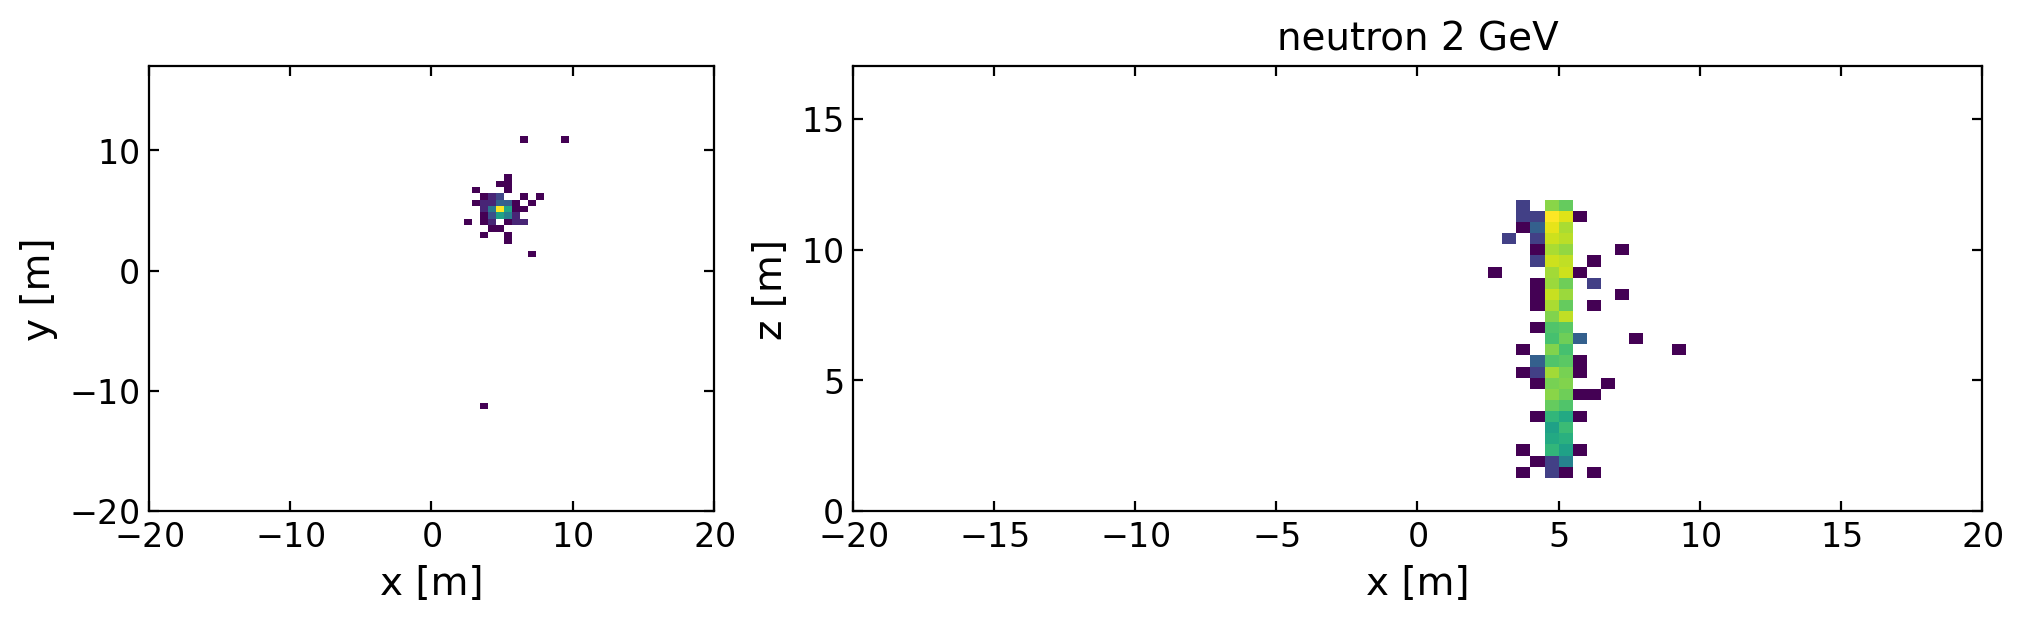

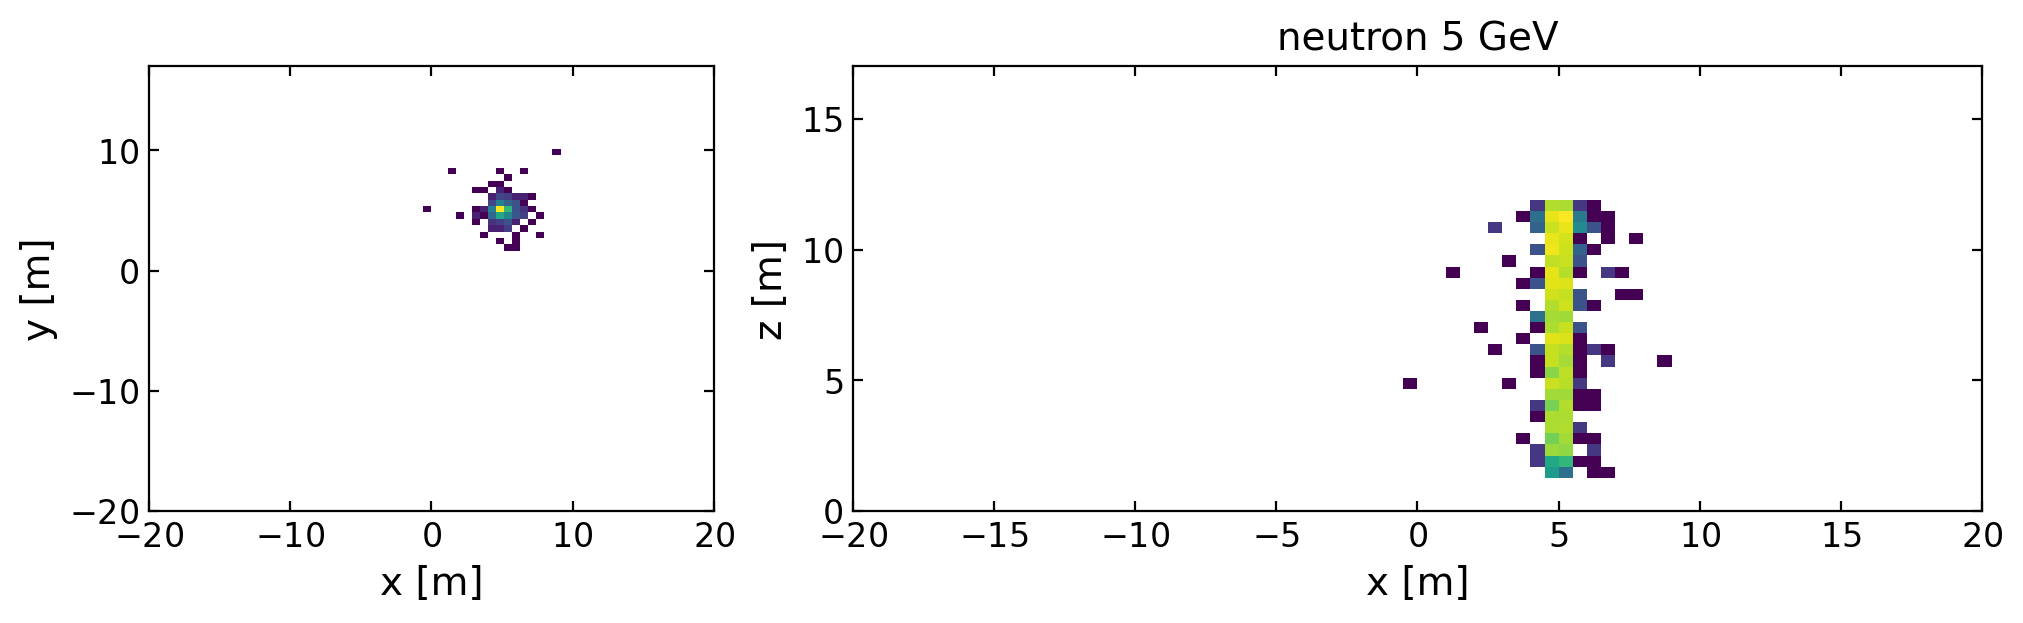

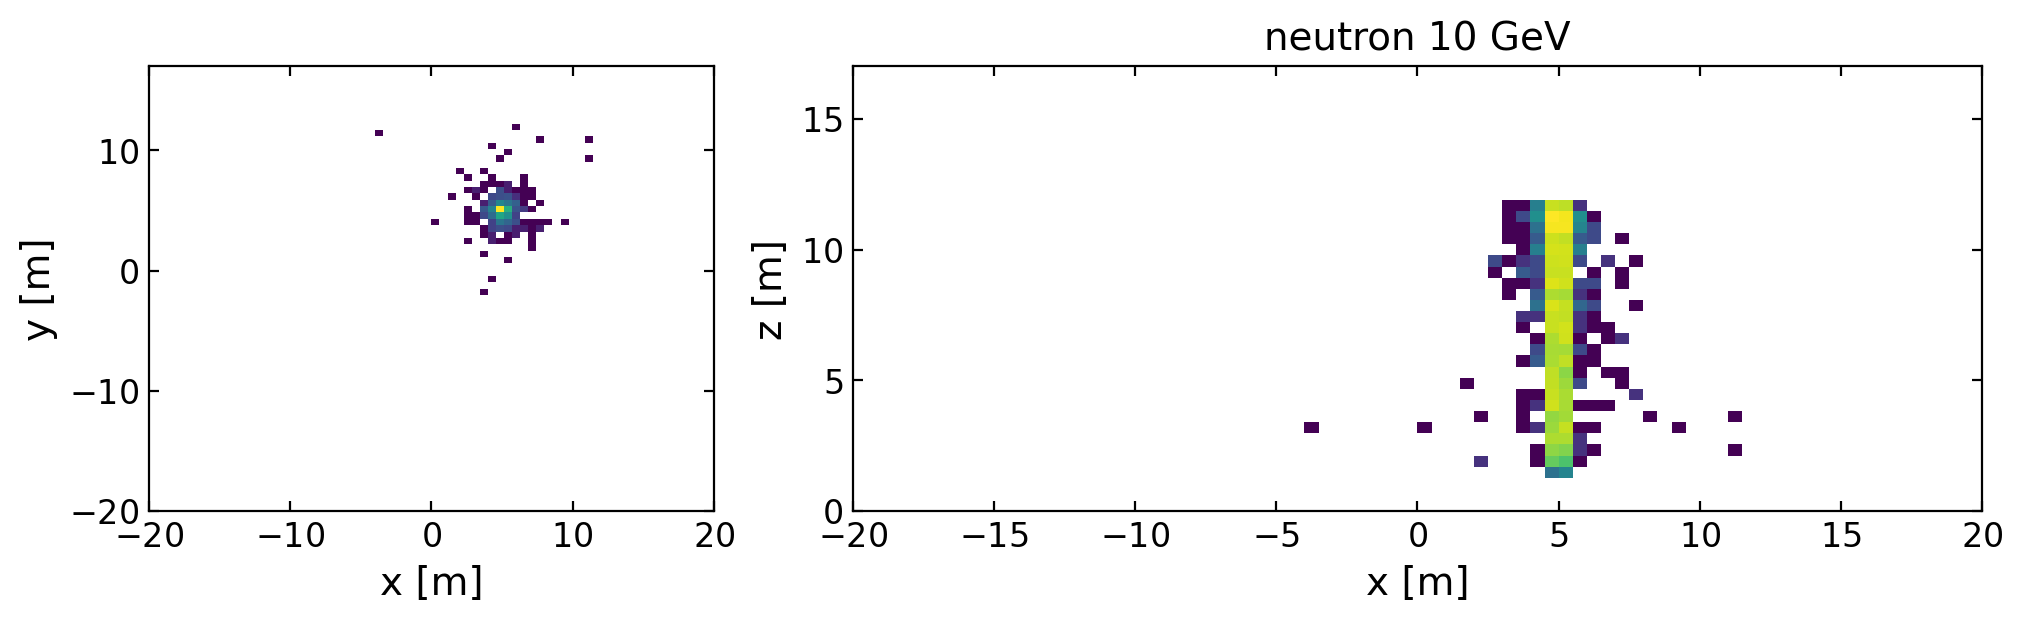

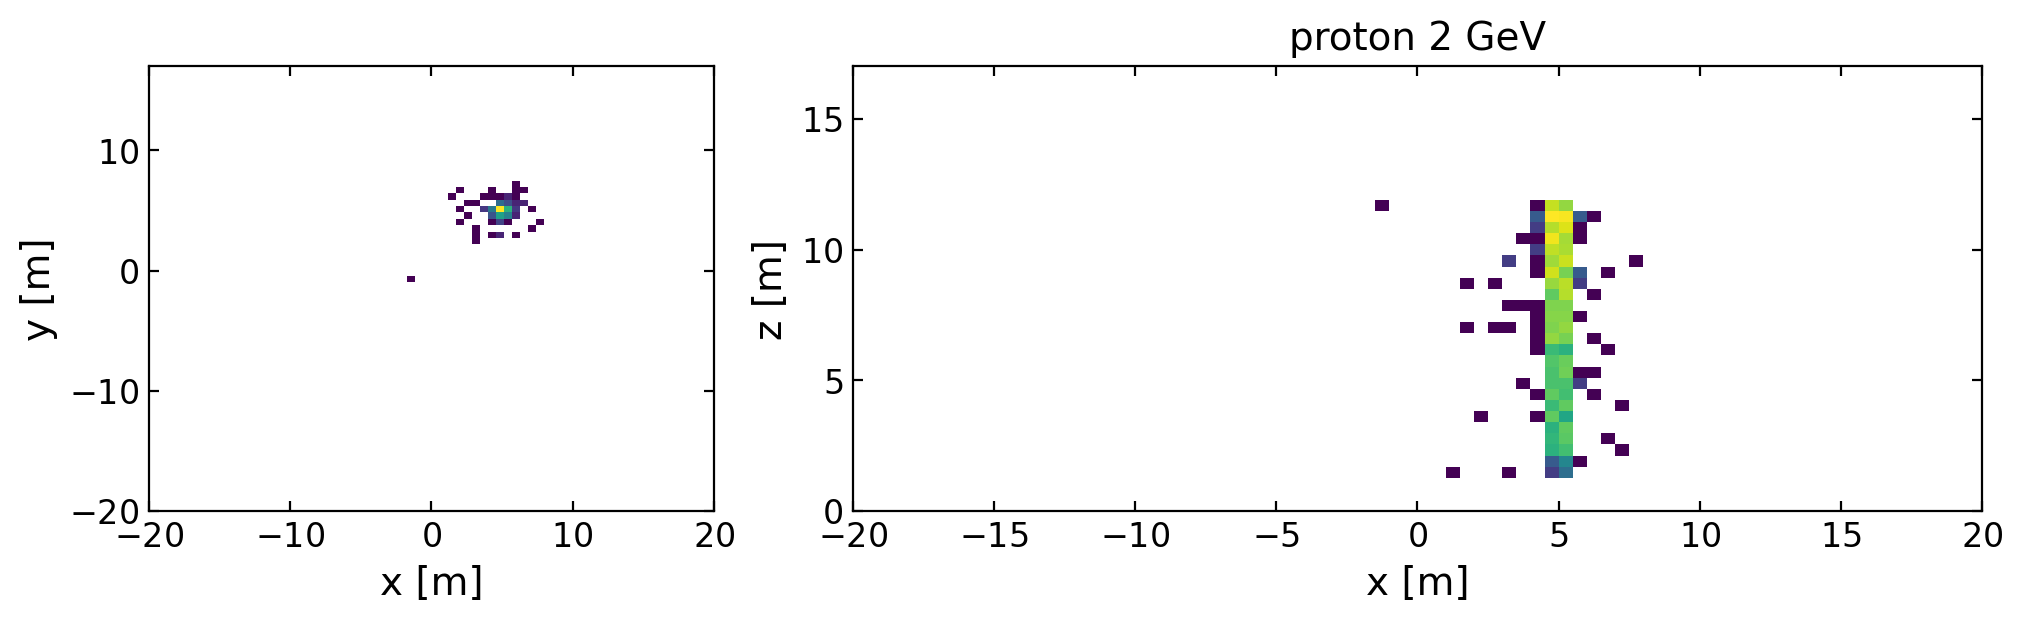

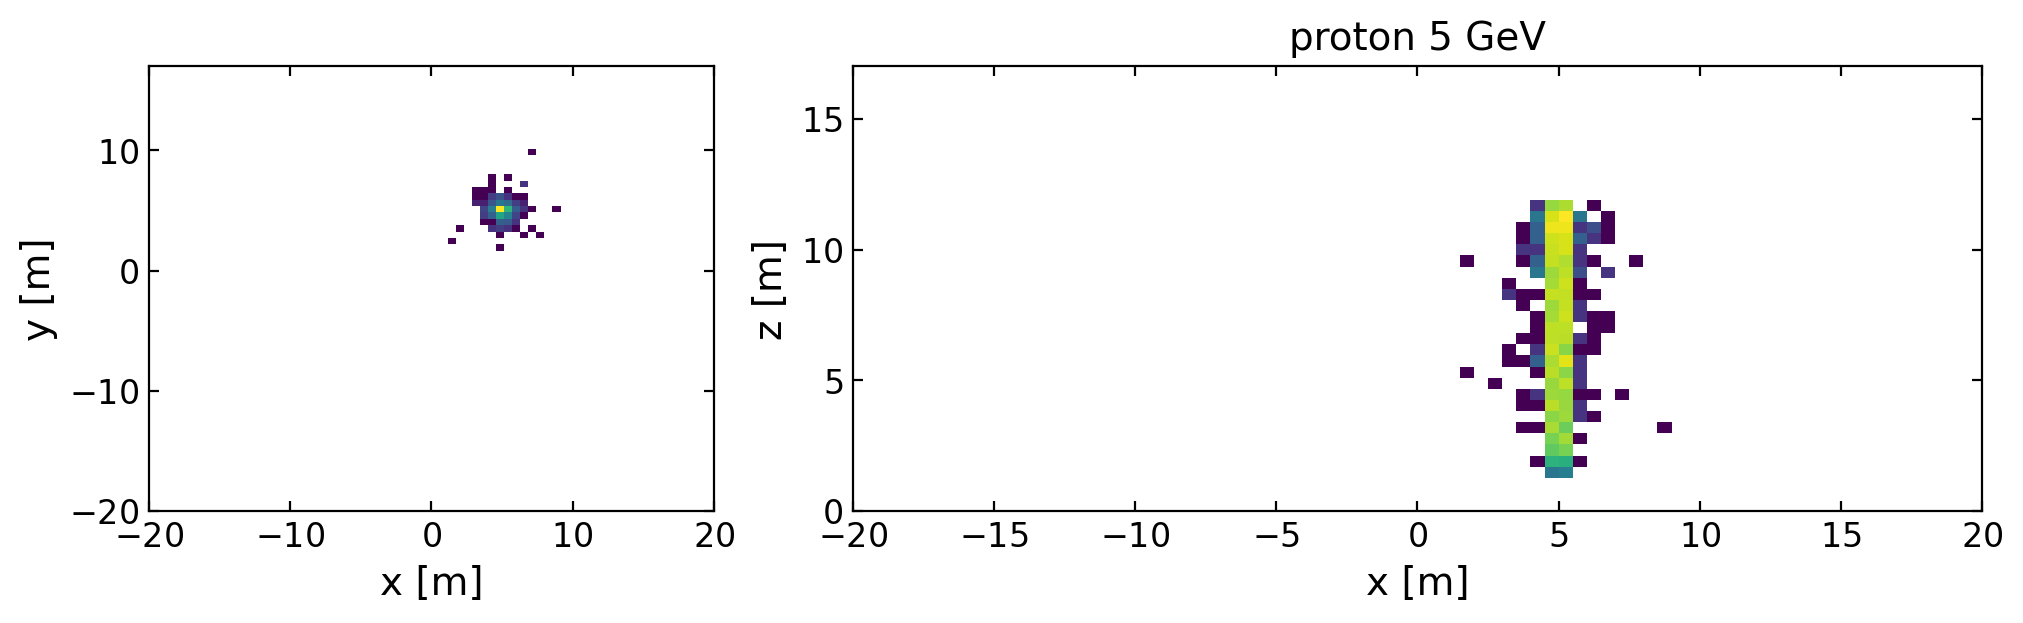

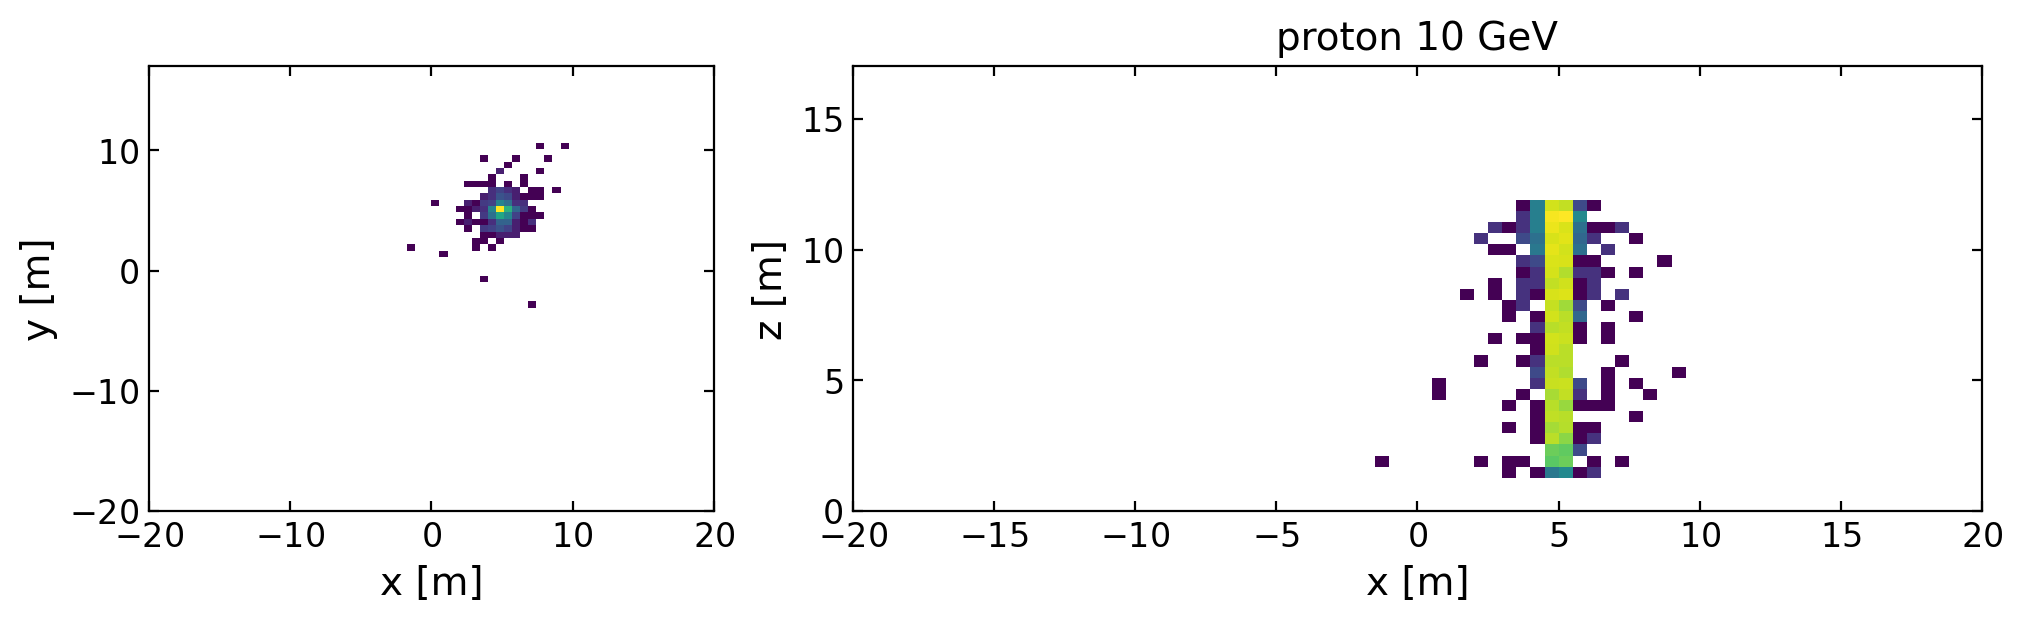

In [102]:
for name in res_all:
    for energy in res_all[name]:
        res = res_all[name][energy]
    
        mask =  res.get_cut("True")
        
        
        fig = plt.figure(figsize=(10,3), layout="constrained")
        spec = fig.add_gridspec(1,3)
        
        ax1 = fig.add_subplot(spec[:, :1])
        ax2 = fig.add_subplot(spec[:, 1:])
    
    
        x = (res["vertex_xyzt"][:,0])[mask]/1000
        y = (res["vertex_xyzt"][:,1])[mask]/1000
        ax1.hist2d(x, y, bins=(70,70), range=((-20,20),(-20,17)), norm=mpl.colors.LogNorm())
        ax1.set_xlabel("x [m]")
        ax1.set_ylabel("y [m]")
    
        x = (res["vertex_xyzt"][:,0])[mask]/1000
        y = (res["vertex_xyzt"][:,2])[mask]/1000
        ax2.hist2d(x, y, bins=(80,40), range=((-20,20),(0,17)), norm=mpl.colors.LogNorm())
        # ax2.scatter(x, y, alpha=0.83 - np.heaviside(i-1,0)*0.8, s=20 - np.heaviside(i-1,0)*19, color=colors[i])
        ax2.set_xlabel("x [m]")
        ax2.set_ylabel("z [m]")

        plt.title(f"{name}".split("_")[0] + " "+str(int(f"{energy}".split("_")[0])//1000) + " GeV")
        
        plt.show()

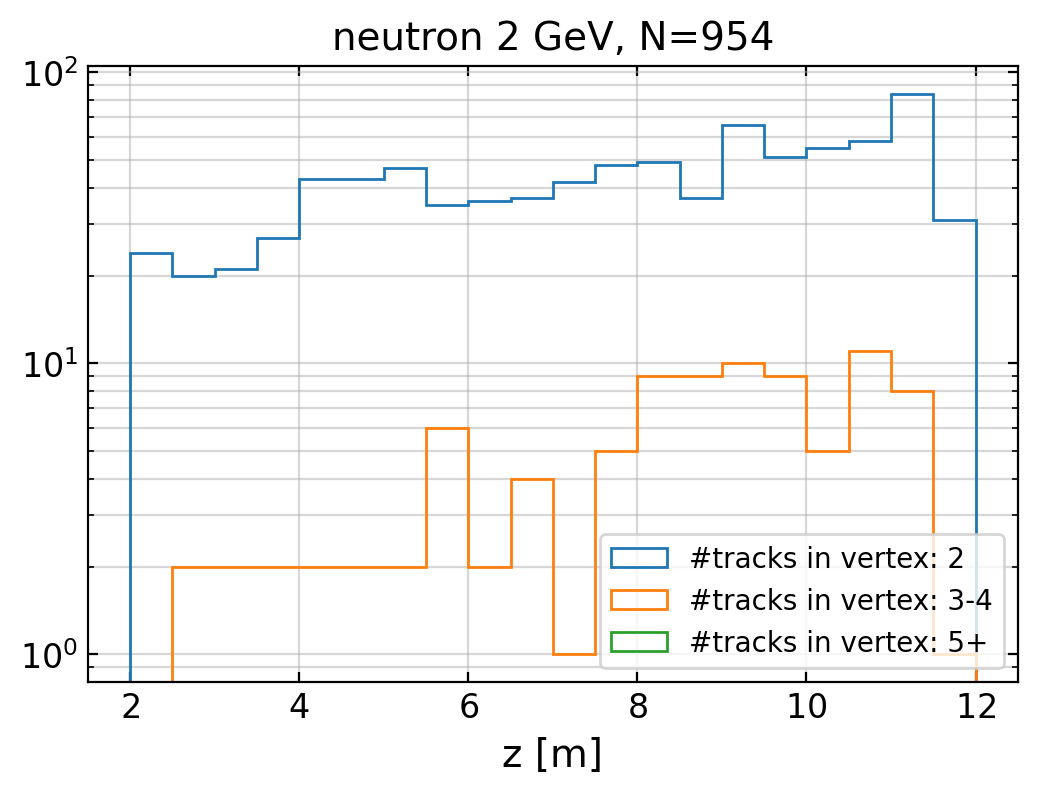

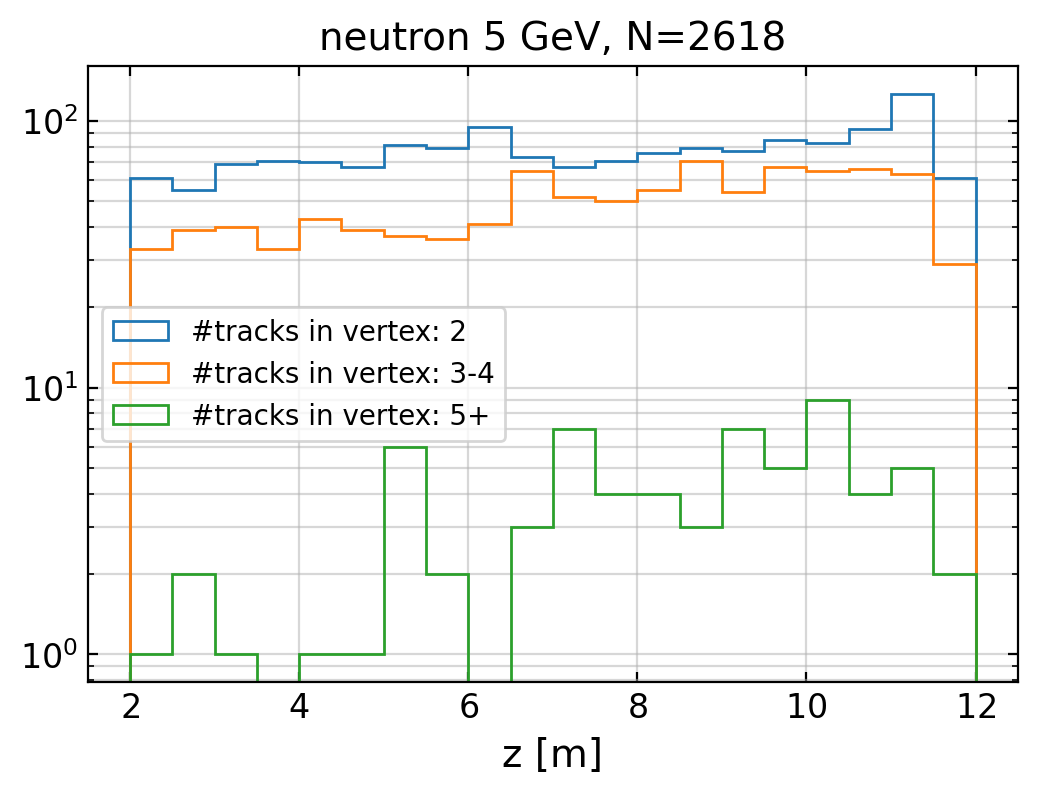

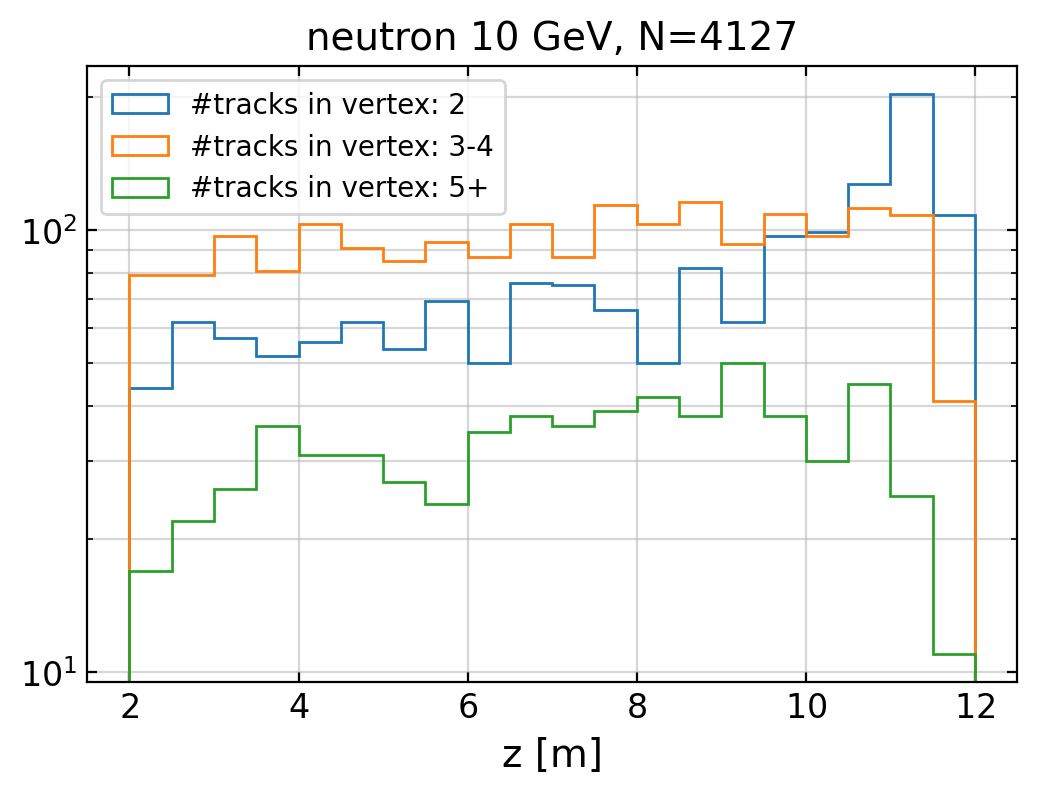

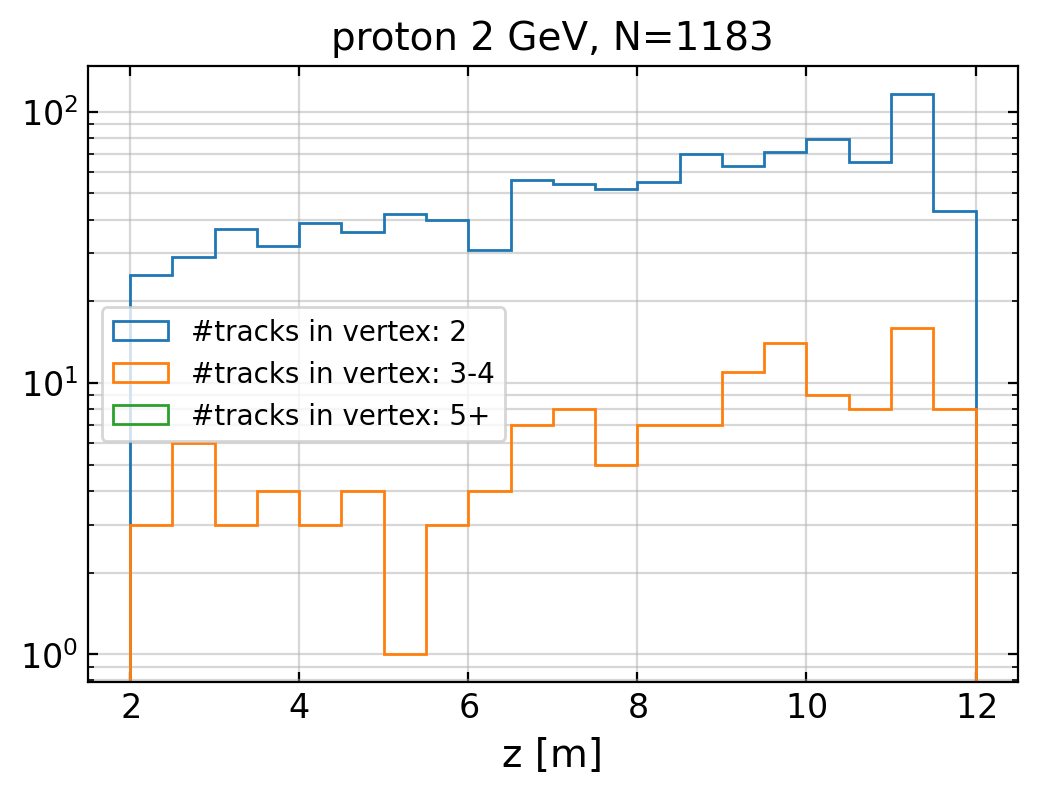

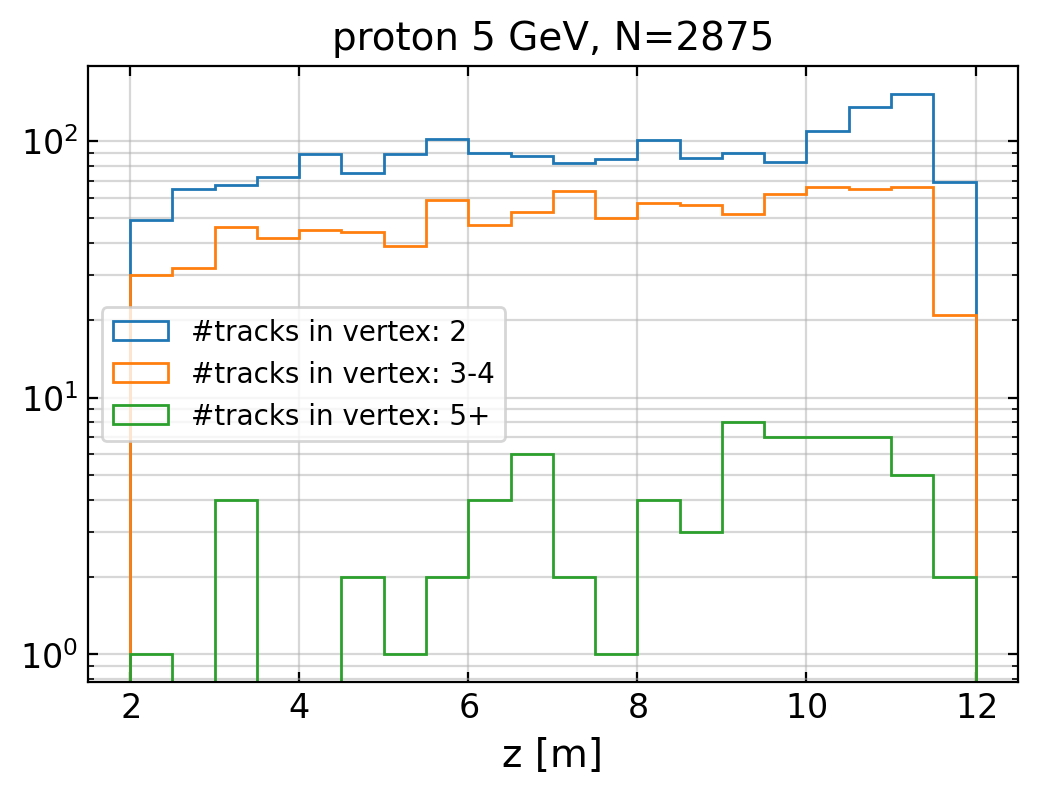

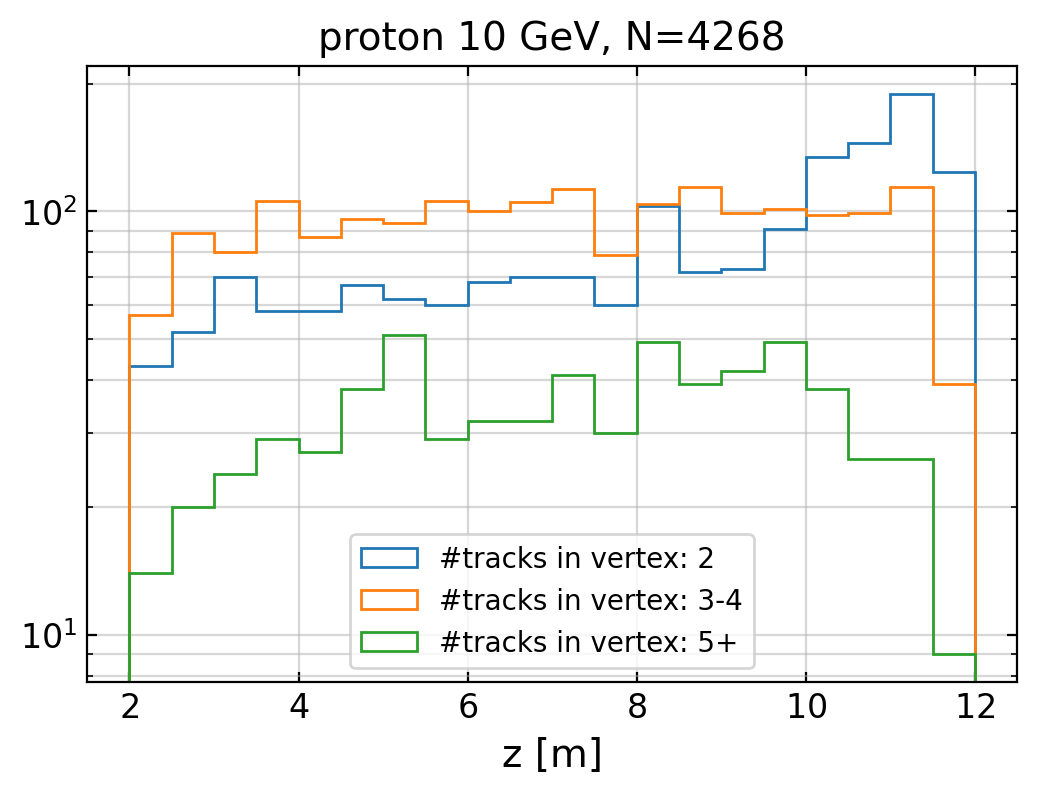

In [99]:
for name in res_all:
    for energy in res_all[name]:
        res = res_all[name][energy]
        bins=np.linspace(0.5,10.5,11)
        n=len(res["vertex_ntracks"])
        # plt.scatter(res["vertex_ntracks"],res["vertex_xyzt"][:,2]*1e-3, s=1, alpha=0.2)
        # plt.hist2d(res["vertex_ntracks"],res["vertex_xyzt"][:,2]*1e-3, bins=(10,20), range=((0.5,10.5),(2,12)), norm=mpl.colors.LogNorm())
        n_cuts = {"2":[2,3], "3-4":[3,5],"5+":[5,100]}
        for ii in n_cuts:
            mask = (res["vertex_ntracks"]>=n_cuts[ii][0]) & ( res["vertex_ntracks"]<n_cuts[ii][1])
            plt.hist(res["vertex_xyzt"][:,2][mask]*1e-3, bins=(20), range=(2,12), histtype="step",label=f"#tracks in vertex: {ii}")
            plt.yscale("log")
        
        plt.legend(fontsize=10)
        plt.xlabel("z [m]")
        # plt.ylabel("#tracks in vertex")
        # plt.xlabel("#tracks in vertex")
        # plt.ylabel("z [m]")
        plt.title(f"{name}".split("_")[0] + " "+str(int(f"{energy}".split("_")[0])//1000) + " GeV"+f", N={n}")
        plt.grid(which="both", alpha=0.5)
        plt.show()